In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import copy

from psm_utils.psm import PSM
from psm_utils.psm_list import PSMList
from psm_utils.io import write_file
from deeplc import FeatExtractor



from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import callbacks
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint, pearsonr
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from IPython.display import display
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Flatten, Attention
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("/home/emmy/Notebooks2/MQ_alignment_output/evidence_aligned_6.csv") #reading in the data
ccs_df = data[['CCS']]
ccs_df.head()

,CCS
0,409.181586
1,675.752631
2,593.085242
3,682.043900
4,492.912110


In [3]:
%matplotlib inline

Epoch 1/20
34463/34463 [==============================] - 715s 21ms/step - loss: 14.9281 - val_loss: 11.4153
Epoch 2/20
34463/34463 [==============================] - 719s 21ms/step - loss: 12.3527 - val_loss: 10.5013
Epoch 3/20
34463/34463 [==============================] - 720s 21ms/step - loss: 11.5111 - val_loss: 14.2730
Epoch 4/20
34463/34463 [==============================] - 717s 21ms/step - loss: 10.9913 - val_loss: 11.1225
Epoch 5/20
34463/34463 [==============================] - 735s 21ms/step - loss: 10.6880 - val_loss: 11.2038
Epoch 6/20
34463/34463 [==============================] - 725s 21ms/step - loss: 10.4350 - val_loss: 10.1509
Epoch 7/20
34463/34463 [==============================] - 717s 21ms/step - loss: 10.2406 - val_loss: 9.4938
Epoch 8/20
34463/34463 [==============================] - 726s 21ms/step - loss: 10.1046 - val_loss: 9.6528
Epoch 9/20
34463/34463 [==============================] - 732s 21ms/step - loss: 9.9763 - val_loss: 9.6085
Epoch 10/20
34463/34463

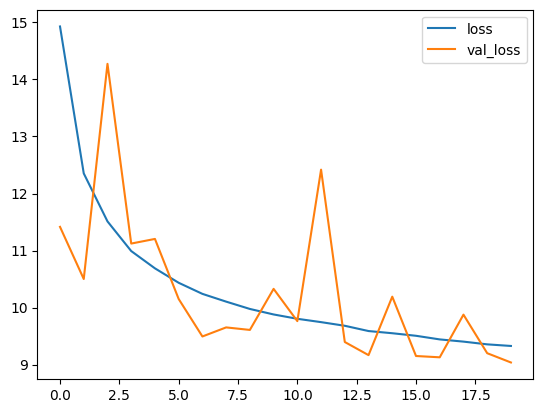

In [10]:
# Train the model with your input and output data
history_rnn = model_rnn.fit([matrix_train, matrix_all_train], ccs_train, epochs=20, batch_size=24, validation_data=([matrix_val, matrix_all_val], ccs_val))

history_df_rnn = pd.DataFrame(history_rnn.history)
history_df_rnn.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_rnn['val_loss'].min()))


The Kernel crashed while executing code in the current cell or a previous cell. 
Please review the code in the cell(s) to identify a possible cause of the failure. 
Click here for more info. 
View Jupyter log for further details.
na epoch 57 gecrasht, in epoch 58 258/3231

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


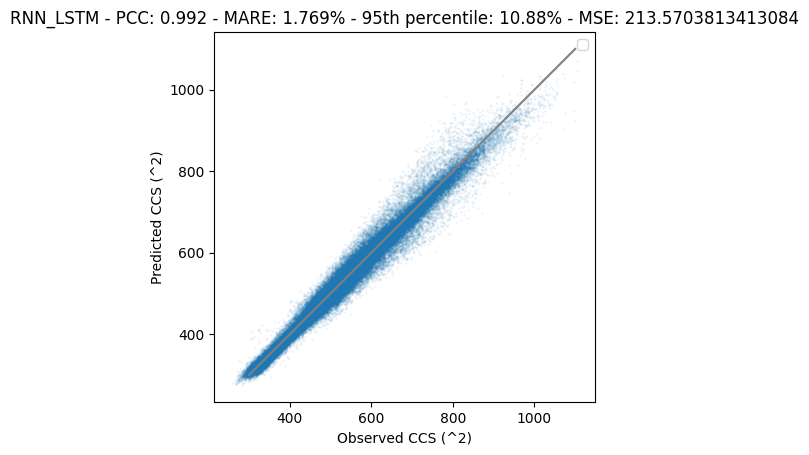

In [17]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error



if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test["CCS"],
    ccs_test["Model_rnn_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test["Model_rnn_predictions"]
true_ccs = ccs_test["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)

plt.title(f"RNN_LSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse}")

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS (^2)")
plt.ylabel("Predicted CCS (^2)")

plt.show()

In [4]:
%matplotlib inline

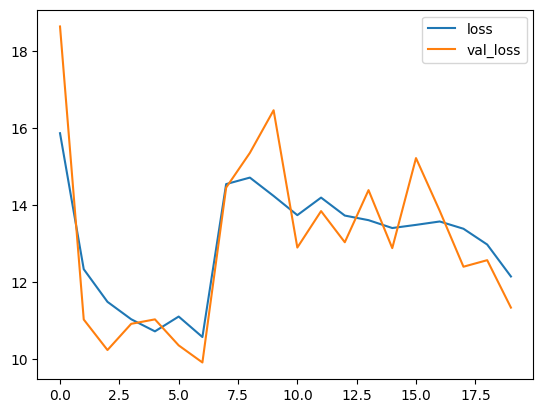

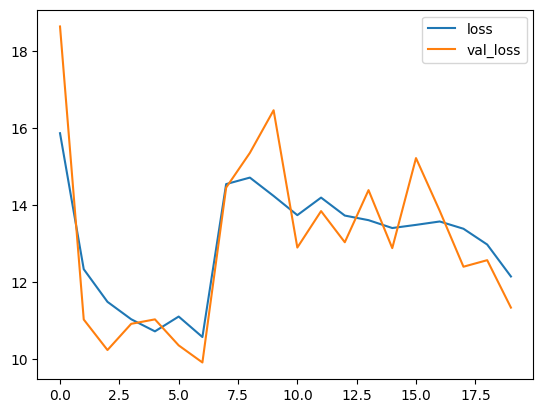

In [4]:
history_df_gru = pd.read_csv('history_rnn_gru.csv')
history_df_gru.loc[:, ['loss', 'val_loss']].plot();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


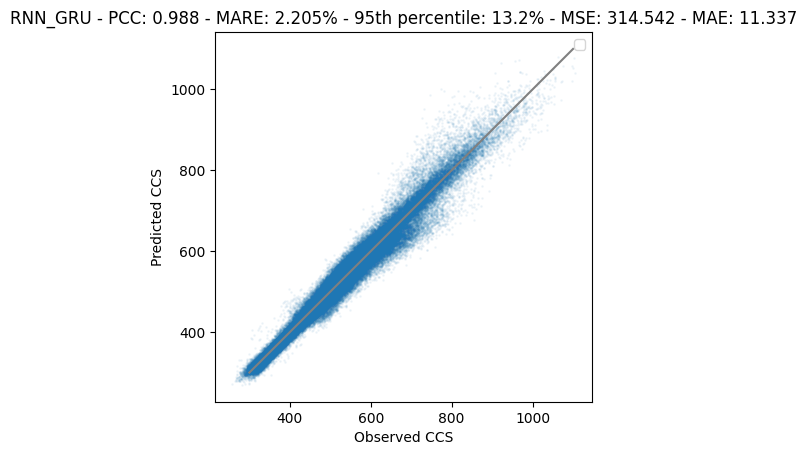

In [5]:
ccs_test_model_rnn_gru = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn_gru.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn_gru["CCS"],
    ccs_test_model_rnn_gru["Model_rnn_gru_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn_gru["Model_rnn_gru_predictions"]
true_ccs = ccs_test_model_rnn_gru["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)

plt.title(f"RNN_GRU - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}")

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()


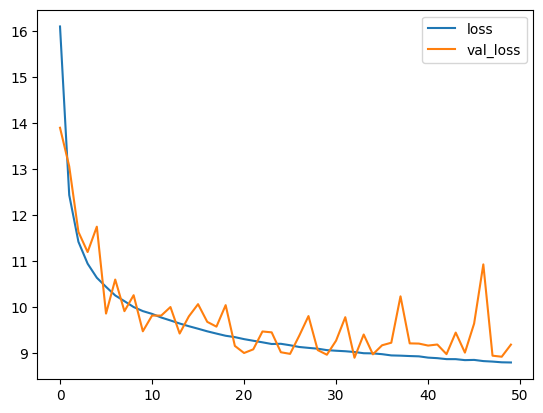

In [4]:
history_df3 = pd.read_csv('history_rnn3.csv')
history_df3.loc[:, ['loss', 'val_loss']].plot();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


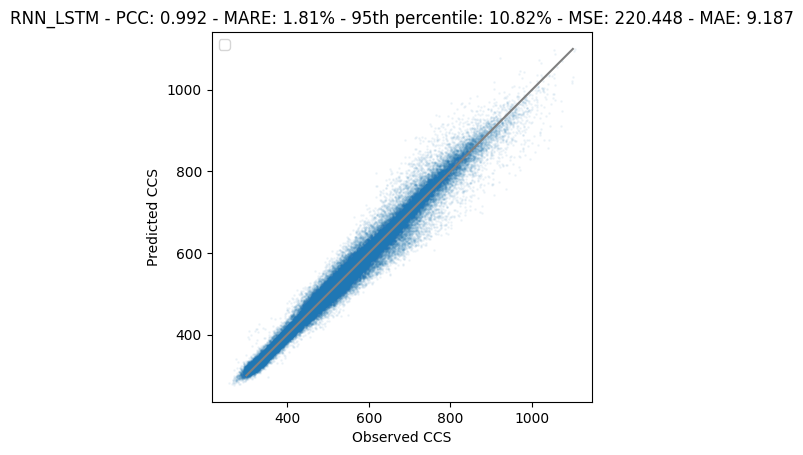

In [6]:
ccs_test_model_rnn3 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn3.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn3["CCS"],
    ccs_test_model_rnn3["Model_rnn3_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn3["Model_rnn3_predictions"]
true_ccs = ccs_test_model_rnn3["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_LSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

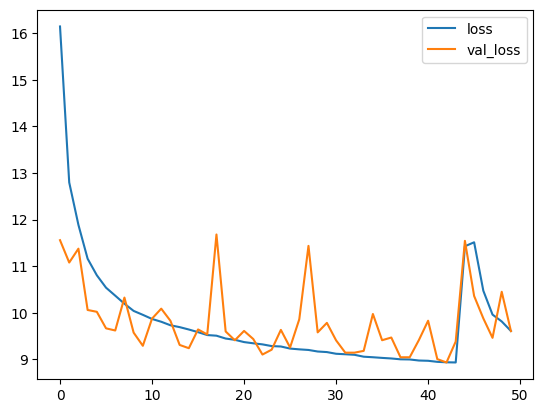

In [4]:
history_df_rnn4 = pd.read_csv('history_rnn4.csv')
history_df_rnn4.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


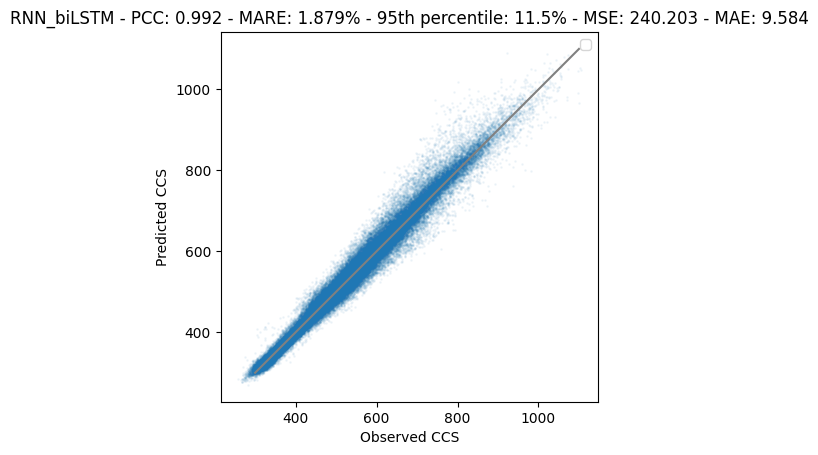

In [7]:
ccs_test_model_rnn4 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn4.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn4["CCS"],
    ccs_test_model_rnn4["Model_rnn4_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn4["Model_rnn4_predictions"]
true_ccs = ccs_test_model_rnn4["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

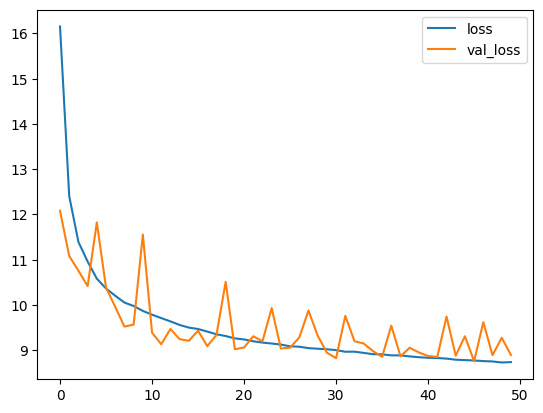

In [9]:
history_df_rnn5 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/history_rnn4.csv')
history_df_rnn5.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


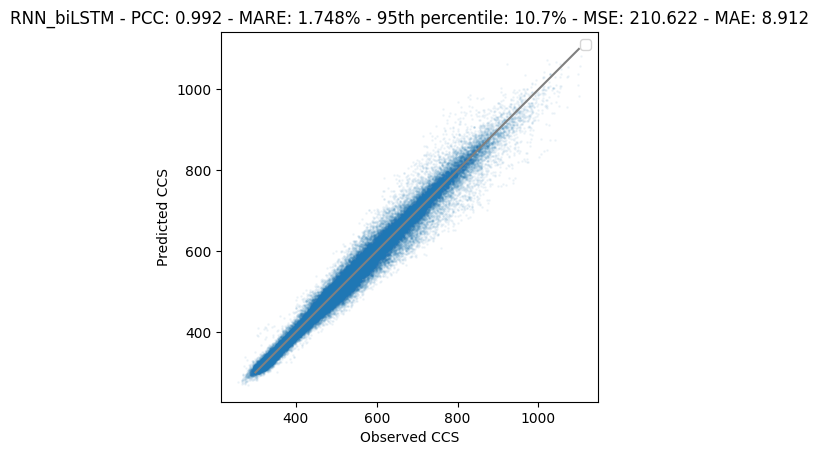

In [10]:
ccs_test_model_rnn5 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn5.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn5["CCS"],
    ccs_test_model_rnn5["Model_rnn5_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn5["Model_rnn5_predictions"]
true_ccs = ccs_test_model_rnn5["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

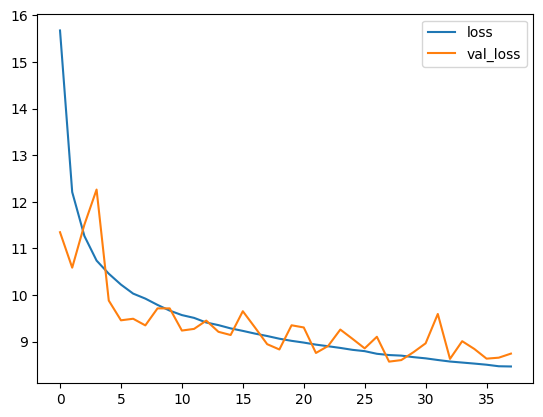

In [11]:
history_df_rnn6 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/history_rnn6.csv')
history_df_rnn6.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


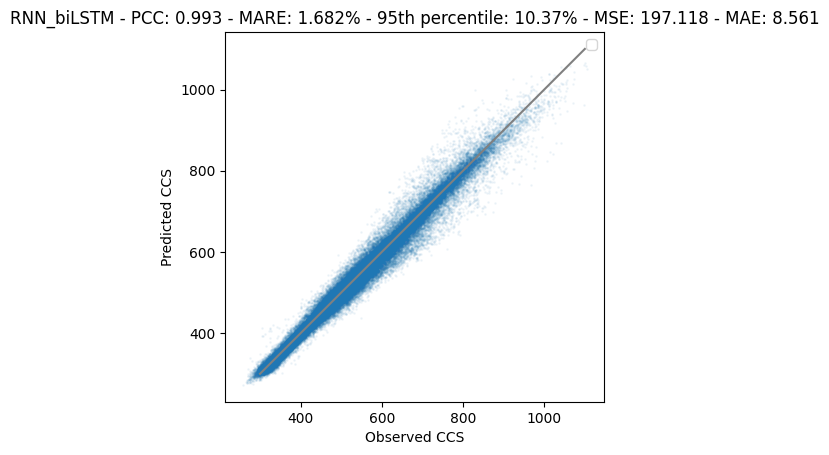

In [12]:
ccs_test_model_rnn6 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn6.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn6["CCS"],
    ccs_test_model_rnn6["Model_rnn6_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn6["Model_rnn6_predictions"]
true_ccs = ccs_test_model_rnn6["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

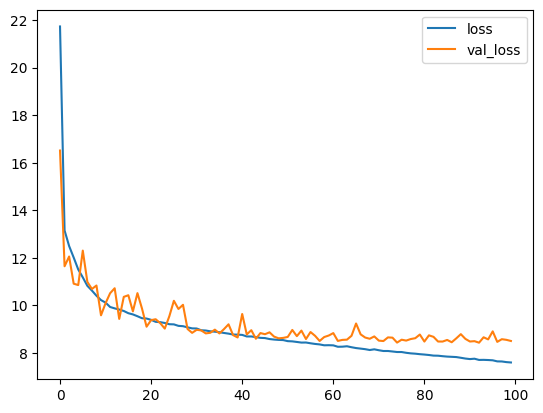

In [13]:
history_df_rnn7 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/history_rnn7.csv')
history_df_rnn7.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


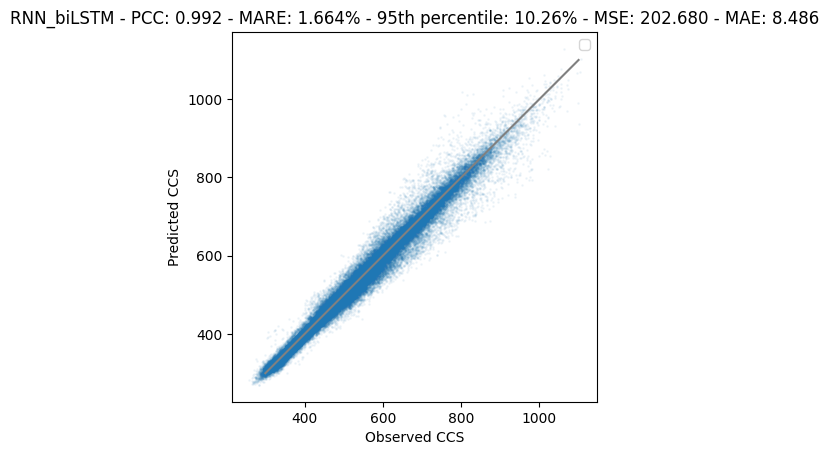

In [14]:
ccs_test_model_rnn7 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn7.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn7["CCS"],
    ccs_test_model_rnn7["Model_rnn7_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn7["Model_rnn7_predictions"]
true_ccs = ccs_test_model_rnn7["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

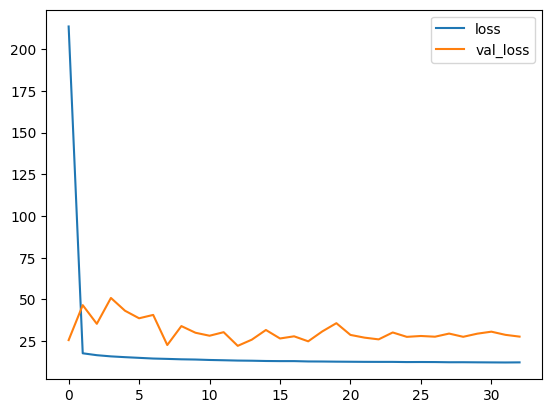

In [15]:
history_df_rnn8 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/history_rnn8.csv')
history_df_rnn8.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


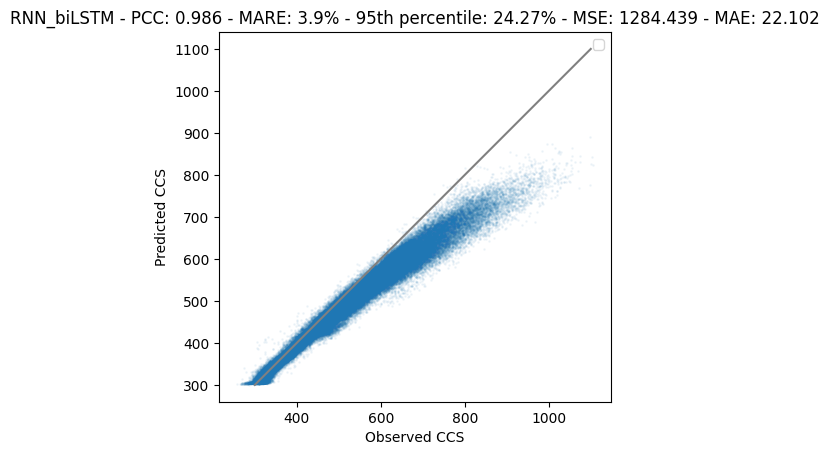

In [16]:
ccs_test_model_rnn8 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn8.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn8["CCS"],
    ccs_test_model_rnn8["Model_rnn8_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn8["Model_rnn8_predictions"]
true_ccs = ccs_test_model_rnn8["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()

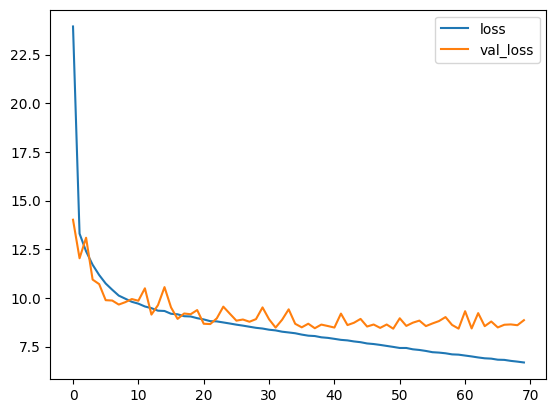

In [17]:
history_df_rnn9 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/history_rnn9.csv')
history_df_rnn9.loc[:, ['loss', 'val_loss']].plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


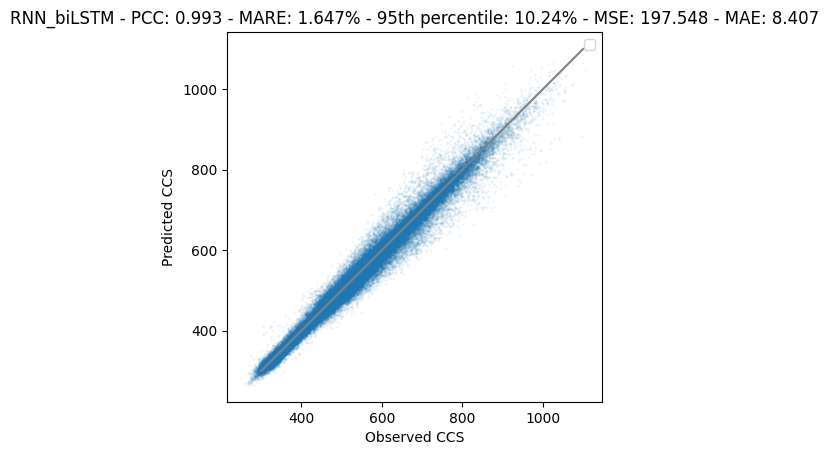

In [18]:
ccs_test_model_rnn9 = pd.read_csv('/home/emmy/Notebooks2/output_RNN/ccs_test_model_rnn9.csv')

if len(ccs_df.index) < 1e4:
    set_alpha = 0.2
    set_size = 3
else:
    set_alpha = 0.05
    set_size = 1

# Scatter plot the observations on the test set against the predictions on the same set
plt.scatter(
    ccs_test_model_rnn9["CCS"],
    ccs_test_model_rnn9["Model_rnn9_predictions"],
    alpha=set_alpha,
    s=set_size,
)



# Plot a diagonal the points should be one
plt.plot([300,1100],[300,1100],c="grey")

legend = plt.legend()

for lh in legend.legendHandles:
    lh.set_sizes([25])
    lh.set_alpha(1)

# Get the predictions and calculate performance metrics
predictions = ccs_test_model_rnn9["Model_rnn9_predictions"]
true_ccs = ccs_test_model_rnn9["CCS"]
mare = round(sum((abs(predictions-true_ccs)/true_ccs)*100)/len(predictions),3)
pcc = round(pearsonr(predictions,true_ccs)[0],3)
perc_95 = round(np.percentile((abs(predictions-true_ccs)/true_ccs)*100,95)*2,2)

# Calculate MSE
mse = mean_squared_error(true_ccs, predictions)
mae = mean_absolute_error(true_ccs, predictions)


plt.title(f"RNN_biLSTM - PCC: {pcc} - MARE: {mare}% - 95th percentile: {perc_95}% - MSE: {mse:.3f} - MAE: {mae:.3f}" )

ax = plt.gca()
ax.set_aspect('equal')

plt.xlabel("Observed CCS")
plt.ylabel("Predicted CCS")

plt.show()